<a href="https://colab.research.google.com/github/varuliant2022/33218010/blob/main/FullyConectedNN_Excercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Regression Problems using FUlly Conected NN EL707


**Nama : Varuliantor Dear NIM  : 33218101 **


In [3]:
import tensorflow as tf
from tensorflow import keras
#from tensorflow.keras import datasets, layers, models, optimizers
from keras import datasets
from keras import layers
from keras import models
from keras import losses 
from keras import optimizers 
from keras import metrics 
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
import numpy as np

Menyiapkan data dari Boston Pricing House

In [4]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


Training Data dan membentuk data untuk diolah

In [5]:
train_data[1],train_data.shape
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

Mengolah data set : Mean dan standar deviasi

In [6]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

Definisikan model yang akan dibangun

In [7]:
def build_model():
    # Because we will need to instantiate
    # the same model multiple times,
    # we use a function to construct it.
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='linear'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

Membuat model yang telah didefinisikan

In [8]:
model = build_model()

Summary Model yang dibangun

In [9]:
model.summary() #Periksa model yang telah dibangun

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


Model Validation dengan prosedur K-Fold, yaitu pengulangan test tanpa adanya overlaping antara tiap "folded"

In [10]:
from keras import backend as K
K.clear_session() # Clean memory K-Fold yang telah digunakan
k=4
num_val_samples = len(train_data) // k
num_epochs = 100
all_mae_histories = []
all_los_histories = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Bangun kembali Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    los_history=history.history['val_loss']
    all_mae_histories.append(mae_history)
    all_los_histories.append(los_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


Periksa property dari history sehingga dapat dibuat grafik analisisnya

In [11]:
history_dict = history.history   # Memeriksa fitur yang ada di history agar bisa dibuat plotnya
print(history_dict.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


Evaluasi hasil dengan menghitung nilai rata-rata nilai MAE (mean Absolute Error)

In [12]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
average_los_history = [
    np.mean([x[i] for x in all_los_histories]) for i in range(num_epochs)]

Buat grafik hasil sebagai performa

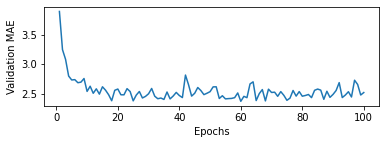

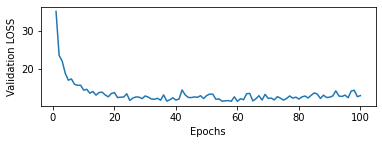

In [13]:
import matplotlib.pyplot as plt

plt.subplot(2, 1, 1)
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

plt.subplot(2, 1, 2)
plt.plot(range(1, len(average_los_history) + 1), average_los_history)
plt.xlabel('Epochs')
plt.ylabel('Validation LOSS')
plt.show()

Test perfoma dari data test dengan menentukan jumlah epoch yang merupakan titik awal  overfiting berdasarkan grafik nilai MAE

In [14]:
# Get a fresh, compiled model.
model = build_model()
# Train it on the entirety of the data.
model.fit(train_data, train_targets,
          epochs=60, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 4ms/step - loss: 18.8376 - mae: 2.7483


In [15]:
test_mae_score

2.7482802867889404

WARNING...Reset semua variabel jika ada keraguan hasil 

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)